# Imports

In [ ]:
!pip install methylprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=f54daa6c5a248b97bff442159079865614f57f26b7d270854e038ff5d99978cc
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
!pip install missingpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 5.8 MB/s eta 0:00:00


In [ ]:


import pandas as pd
import requests
import os
from tqdm import tqdm
import methylprep

# Download data

In [ ]:
if 'data' not in os.listdir():
    os.mkdir('data')
else:
    print('data/ already exists...')

In [ ]:
if 'GSE111631' not in os.listdir('data'):
    os.mkdir('data/GSE111631')
!python -m methylprep -v download -i GSE111631 -d data/GSE111631 -o
print('Have to fix sample sheet...')
sample_sheet = pd.read_csv('data/GSE111631/GPL21145/GSE111631_GPL21145_samplesheet.csv')
sample_sheet = sample_sheet.drop(columns=['sentrix_id', 'sentrix_position'])
sample_sheet.to_csv('data/GSE111631/GPL21145/GSE111631_GPL21145_samplesheet.csv', index=None)
!python -m methylprep process -d data/GSE111631/GPL21145 -bv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
#from tqdm.notebook import tqdm
import os

## Load GSE111631 beta values & meta data

In [ ]:
from google.colab import drive
drive.mount('/content/data')

In [ ]:
# beta values
gse111631_betas = pd.read_pickle(r'/content/data/Shareddrives/Deep_Learning_G&R/Copy_beta_values.pkl')
print(f'# probes: {gse111631_betas.shape[0]} \n# samples: {gse111631_betas.shape[1]}')
gse111631_betas

# probes: 865859 
# samples: 168


,201172560029_R01C01,201172560029_R02C01,201172560029_R03C01,201172560029_R04C01,201172560029_R05C01,201172560029_R06C01,201172560029_R07C01,201172560029_R08C01,201172560030_R01C01,201172560030_R02C01,...,201533510013_R07C01,201533510013_R08C01,201533510060_R01C01,201533510060_R02C01,201533510060_R03C01,201533510060_R04C01,201533510060_R05C01,201533510060_R06C01,201533510060_R07C01,201533510060_R08C01
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.784,NaN,NaN,NaN,NaN
cg00000103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,0.882,NaN,0.889,0.900,0.916,0.916,0.915,0.938,0.862,0.902,...,0.934,0.925,0.881,0.873,0.922,0.925,0.931,0.924,0.925,0.941
cg00000155,0.936,0.907,0.930,0.944,0.930,0.950,0.936,0.941,0.900,0.911,...,0.956,0.954,0.935,0.934,0.941,0.951,0.948,0.958,0.958,0.958
cg00000158,0.934,0.932,0.933,0.935,0.950,0.960,0.949,0.949,0.916,0.935,...,0.977,0.966,0.952,0.934,0.953,0.953,0.966,0.973,0.975,0.971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.97129969R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.X.97133160R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.X.97651759F,0.102,NaN,0.093,0.092,0.067,0.064,0.074,0.087,NaN,0.089,...,0.049,NaN,0.047,0.068,0.077,0.074,0.125,0.185,0.056,NaN


In [ ]:
# meta values
gse111631_meta = pd.read_pickle(r'/content/data/Shareddrives/Deep_Learning_G&R/GSE111631_GPL21145_meta_data.pkl')
print(f'# metadata attributes: {gse111631_meta.shape[1]} \n# samples: {gse111631_meta.shape[0]}')
gse111631_meta.head()

# metadata attributes: 12 
# samples: 168


,GSM_ID,Sample_Name,Sentrix_ID,Sentrix_Position,source,molecule subtype,sample_plate,sentrix_position,sentrix_id,gender,description,Sample_ID
0,GSM3035989,SLV1,201530450003,R01C01,genomic DNA from saliva sample SLV1,bi-sulphite converted genomic DNA from SLV1,2,R01C01,201530450003,M,Saliva tissue samples,201530450003_R01C01
1,GSM3035990,SLV2,201530450003,R02C01,genomic DNA from saliva sample SLV2,bi-sulphite converted genomic DNA from SLV2,2,R02C01,201530450003,M,Saliva tissue samples,201530450003_R02C01
2,GSM3035991,SLV3,201530450003,R03C01,genomic DNA from saliva sample SLV3,bi-sulphite converted genomic DNA from SLV3,2,R03C01,201530450003,M,Saliva tissue samples,201530450003_R03C01
3,GSM3035992,SLV4,201530450003,R04C01,genomic DNA from saliva sample SLV4,bi-sulphite converted genomic DNA from SLV4,2,R04C01,201530450003,M,Saliva tissue samples,201530450003_R04C01
4,GSM3035993,SLV5,201530450003,R05C01,genomic DNA from saliva sample SLV5,bi-sulphite converted genomic DNA from SLV5,2,R05C01,201530450003,F,Saliva tissue samples,201530450003_R05C01


## Betas EDA
### Things to take into acocunt:
1. Probes (beta-values) with detection p-value (pOOBAH values) >0.05 are were removed in the first processing portion (methylprep)
    * This is to make sure any probes that the machine was unsure about aren't taken into account (garbage in, garbage out)
2. Buccal cell samples (saliva) can be largely heteregeneous due to many factors

In [ ]:
# probes with > 5% missing values
print(f'{(gse111631_betas.T.isna().sum()/gse111631_betas.shape[1] > 0.05).sum()} probes with > 5% missing values')

332599 probes with > 5% missing values


In [ ]:
# probes with all values missing
print(f'{((gse111631_betas.T.isna().sum()/gse111631_betas.shape[1]) == 1).sum()} probes with all values missing')

112616 probes with all values missing


In [ ]:
# samples with >30% missing values
print(f'{(gse111631_betas.isna().sum()/gse111631_betas.shape[0] > 0.25).sum()} samples with >25% missing values')

45 samples with >25% missing values


In [ ]:
# remove samples with >25% missing values (possibly poor samples)
gse111631_betas_dropped_samples = gse111631_betas.T[~(gse111631_betas.isna().sum()/gse111631_betas.shape[0] > 0.25)].T
print(gse111631_betas_dropped_samples.shape)
gse111631_betas_dropped_samples.head()

(865859, 123)


,201172560029_R04C01,201172560029_R05C01,201172560029_R06C01,201172560029_R07C01,201172560029_R08C01,201172560030_R02C01,201172560030_R05C01,201172560030_R07C01,201172560034_R01C01,201172560034_R03C01,...,201533510013_R07C01,201533510013_R08C01,201533510060_R01C01,201533510060_R02C01,201533510060_R03C01,201533510060_R04C01,201533510060_R05C01,201533510060_R06C01,201533510060_R07C01,201533510060_R08C01
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.784,NaN,NaN,NaN,NaN
cg00000103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,0.900,0.916,0.916,0.915,0.938,0.902,0.924,0.896,0.910,0.903,...,0.934,0.925,0.881,0.873,0.922,0.925,0.931,0.924,0.925,0.941
cg00000155,0.944,0.930,0.950,0.936,0.941,0.911,0.935,0.912,0.922,0.928,...,0.956,0.954,0.935,0.934,0.941,0.951,0.948,0.958,0.958,0.958
cg00000158,0.935,0.950,0.960,0.949,0.949,0.935,0.950,0.935,0.944,0.945,...,0.977,0.966,0.952,0.934,0.953,0.953,0.966,0.973,0.975,0.971


In [ ]:
# remove probes with more than the cutoff% missing values (possibly poor quality probes)
cutoff = 0.25
gse111631_betas_dropped = gse111631_betas_dropped_samples[~(gse111631_betas_dropped_samples.T.isna().sum()/gse111631_betas_dropped_samples.shape[1] > cutoff)]
print(gse111631_betas_dropped_samples.shape[0] - gse111631_betas_dropped.shape[0], f'probes dropped (w/ more than {cutoff*100}% missing values accross samples)')
print(gse111631_betas_dropped.shape)
gse111631_betas_dropped.head()

189729 probes dropped (w/ more than 25.0% missing values accross samples)
(676130, 123)


,201172560029_R04C01,201172560029_R05C01,201172560029_R06C01,201172560029_R07C01,201172560029_R08C01,201172560030_R02C01,201172560030_R05C01,201172560030_R07C01,201172560034_R01C01,201172560034_R03C01,...,201533510013_R07C01,201533510013_R08C01,201533510060_R01C01,201533510060_R02C01,201533510060_R03C01,201533510060_R04C01,201533510060_R05C01,201533510060_R06C01,201533510060_R07C01,201533510060_R08C01
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000109,0.900,0.916,0.916,0.915,0.938,0.902,0.924,0.896,0.910,0.903,...,0.934,0.925,0.881,0.873,0.922,0.925,0.931,0.924,0.925,0.941
cg00000155,0.944,0.930,0.950,0.936,0.941,0.911,0.935,0.912,0.922,0.928,...,0.956,0.954,0.935,0.934,0.941,0.951,0.948,0.958,0.958,0.958
cg00000158,0.935,0.950,0.960,0.949,0.949,0.935,0.950,0.935,0.944,0.945,...,0.977,0.966,0.952,0.934,0.953,0.953,0.966,0.973,0.975,0.971
cg00000221,0.890,0.890,0.910,0.895,0.896,0.849,0.852,NaN,0.845,0.830,...,0.901,0.900,NaN,NaN,NaN,0.885,0.899,0.899,0.886,0.913
cg00000236,0.880,0.865,0.858,0.846,0.873,0.881,0.798,0.855,0.883,0.852,...,0.841,0.896,0.890,0.900,0.887,0.855,0.851,0.895,0.876,0.913


In [ ]:
gse111631_betas_no_na = gse111631_betas_dropped.dropna()
print(gse111631_betas_dropped.shape[0] - gse111631_betas_no_na.shape[0], f'probes dropped when dropping all nan \n{gse111631_betas_no_na.shape[0]} probes remaining')
print(gse111631_betas_no_na.shape)
gse111631_betas_no_na.head()

113213 probes dropped when dropping all nan 
562917 probes remaining
(562917, 123)


,201172560029_R04C01,201172560029_R05C01,201172560029_R06C01,201172560029_R07C01,201172560029_R08C01,201172560030_R02C01,201172560030_R05C01,201172560030_R07C01,201172560034_R01C01,201172560034_R03C01,...,201533510013_R07C01,201533510013_R08C01,201533510060_R01C01,201533510060_R02C01,201533510060_R03C01,201533510060_R04C01,201533510060_R05C01,201533510060_R06C01,201533510060_R07C01,201533510060_R08C01
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000109,0.900,0.916,0.916,0.915,0.938,0.902,0.924,0.896,0.910,0.903,...,0.934,0.925,0.881,0.873,0.922,0.925,0.931,0.924,0.925,0.941
cg00000155,0.944,0.930,0.950,0.936,0.941,0.911,0.935,0.912,0.922,0.928,...,0.956,0.954,0.935,0.934,0.941,0.951,0.948,0.958,0.958,0.958
cg00000158,0.935,0.950,0.960,0.949,0.949,0.935,0.950,0.935,0.944,0.945,...,0.977,0.966,0.952,0.934,0.953,0.953,0.966,0.973,0.975,0.971
cg00000236,0.880,0.865,0.858,0.846,0.873,0.881,0.798,0.855,0.883,0.852,...,0.841,0.896,0.890,0.900,0.887,0.855,0.851,0.895,0.876,0.913
cg00000292,0.844,0.896,0.910,0.872,0.908,0.825,0.907,0.917,0.921,0.891,...,0.855,0.880,0.819,0.736,0.867,0.929,0.874,0.824,0.886,0.917


## Randomly create missing values

In [ ]:
gse111631_betas_no_na

,201172560029_R04C01,201172560029_R05C01,201172560029_R06C01,201172560029_R07C01,201172560029_R08C01,201172560030_R02C01,201172560030_R05C01,201172560030_R07C01,201172560034_R01C01,201172560034_R03C01,...,201533510013_R07C01,201533510013_R08C01,201533510060_R01C01,201533510060_R02C01,201533510060_R03C01,201533510060_R04C01,201533510060_R05C01,201533510060_R06C01,201533510060_R07C01,201533510060_R08C01
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000109,0.900,0.916,0.916,0.915,0.938,0.902,0.924,0.896,0.910,0.903,...,0.934,0.925,0.881,0.873,0.922,0.925,0.931,0.924,0.925,0.941
cg00000155,0.944,0.930,0.950,0.936,0.941,0.911,0.935,0.912,0.922,0.928,...,0.956,0.954,0.935,0.934,0.941,0.951,0.948,0.958,0.958,0.958
cg00000158,0.935,0.950,0.960,0.949,0.949,0.935,0.950,0.935,0.944,0.945,...,0.977,0.966,0.952,0.934,0.953,0.953,0.966,0.973,0.975,0.971
cg00000236,0.880,0.865,0.858,0.846,0.873,0.881,0.798,0.855,0.883,0.852,...,0.841,0.896,0.890,0.900,0.887,0.855,0.851,0.895,0.876,0.913
cg00000292,0.844,0.896,0.910,0.872,0.908,0.825,0.907,0.917,0.921,0.891,...,0.855,0.880,0.819,0.736,0.867,0.929,0.874,0.824,0.886,0.917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.9.98463211R,0.041,0.037,0.035,0.034,0.054,0.054,0.044,0.041,0.047,0.050,...,0.034,0.035,0.040,0.057,0.037,0.040,0.032,0.033,0.032,0.034
ch.X.114073068F,0.066,0.050,0.059,0.048,0.055,0.078,0.069,0.060,0.071,0.061,...,0.108,0.062,0.058,0.053,0.058,0.072,0.059,0.051,0.076,0.063
ch.X.153018199F,0.029,0.032,0.028,0.025,0.035,0.034,0.033,0.033,0.031,0.055,...,0.064,0.072,0.026,0.035,0.035,0.030,0.035,0.031,0.030,0.026


In [ ]:
# make a mask to remove p_remove % values (only takes 10, 20, 30, 40, 50, 60, 70, 80)
p_remove = 10 # (only takes 10, 20, 30, 40, 50, 60, 70, 80)

p_to_num = {10: 8, 20:7, 30:6, 40:5, 50:4, 60:3, 70:2, 80:1}

np.random.seed(100)
mask = np.random.randint(0,10,size=gse111631_betas_no_na.shape)
mask = pd.DataFrame(mask, index=gse111631_betas_no_na.index, columns=gse111631_betas_no_na.columns)
mask = mask>p_to_num[p_remove]
print(f'% to remove: {mask.sum().sum()/(mask.shape[0]*mask.shape[1])}')
print(mask.shape)
mask.head()

% to remove: 0.10003929733550662
(562917, 123)


,201172560029_R04C01,201172560029_R05C01,201172560029_R06C01,201172560029_R07C01,201172560029_R08C01,201172560030_R02C01,201172560030_R05C01,201172560030_R07C01,201172560034_R01C01,201172560034_R03C01,...,201533510013_R07C01,201533510013_R08C01,201533510060_R01C01,201533510060_R02C01,201533510060_R03C01,201533510060_R04C01,201533510060_R05C01,201533510060_R06C01,201533510060_R07C01,201533510060_R08C01
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000109,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
cg00000155,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
cg00000158,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
cg00000236,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
cg00000292,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
gse111631_betas_removed = gse111631_betas_no_na.mask(mask)
print(gse111631_betas_removed.shape)
gse111631_betas_removed.head()

(562917, 123)


,201172560029_R04C01,201172560029_R05C01,201172560029_R06C01,201172560029_R07C01,201172560029_R08C01,201172560030_R02C01,201172560030_R05C01,201172560030_R07C01,201172560034_R01C01,201172560034_R03C01,...,201533510013_R07C01,201533510013_R08C01,201533510060_R01C01,201533510060_R02C01,201533510060_R03C01,201533510060_R04C01,201533510060_R05C01,201533510060_R06C01,201533510060_R07C01,201533510060_R08C01
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000109,0.900,0.916,0.916,0.915,0.938,0.902,0.924,0.896,0.910,0.903,...,0.934,0.925,0.881,0.873,0.922,0.925,NaN,0.924,0.925,0.941
cg00000155,0.944,0.930,NaN,0.936,NaN,0.911,0.935,0.912,0.922,0.928,...,0.956,NaN,0.935,0.934,0.941,0.951,0.948,0.958,0.958,0.958
cg00000158,0.935,0.950,NaN,0.949,0.949,0.935,0.950,0.935,0.944,0.945,...,0.977,0.966,0.952,NaN,0.953,0.953,0.966,0.973,0.975,0.971
cg00000236,NaN,0.865,0.858,0.846,0.873,0.881,0.798,0.855,0.883,0.852,...,0.841,0.896,0.890,NaN,0.887,0.855,0.851,0.895,0.876,0.913
cg00000292,NaN,0.896,0.910,0.872,0.908,0.825,0.907,0.917,NaN,NaN,...,0.855,0.880,0.819,0.736,NaN,0.929,0.874,0.824,0.886,0.917


## Create train & test files

In [ ]:
gse111631_betas_no_na_sampled = gse111631_betas_no_na.sample(100, random_state=100)
print(gse111631_betas_no_na_sampled.shape)
gse111631_betas_no_na_sampled.head()

(100, 123)


,201172560029_R04C01,201172560029_R05C01,201172560029_R06C01,201172560029_R07C01,201172560029_R08C01,201172560030_R02C01,201172560030_R05C01,201172560030_R07C01,201172560034_R01C01,201172560034_R03C01,...,201533510013_R07C01,201533510013_R08C01,201533510060_R01C01,201533510060_R02C01,201533510060_R03C01,201533510060_R04C01,201533510060_R05C01,201533510060_R06C01,201533510060_R07C01,201533510060_R08C01
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg17357548,0.945,0.949,0.932,0.951,0.932,0.925,0.943,0.927,0.943,0.945,...,0.938,0.938,0.934,0.921,0.918,0.953,0.939,0.893,0.914,0.943
cg24592462,0.014,0.013,0.013,0.011,0.011,0.021,0.017,0.016,0.019,0.013,...,0.013,0.014,0.014,0.014,0.013,0.014,0.011,0.014,0.010,0.011
cg07068870,0.066,0.048,0.051,0.068,0.062,0.117,0.068,0.095,0.075,0.086,...,0.079,0.117,0.078,0.093,0.084,0.062,0.057,0.091,0.101,0.156
cg07576175,0.022,0.026,0.020,0.029,0.025,0.036,0.029,0.025,0.023,0.032,...,0.025,0.022,0.030,0.023,0.019,0.022,0.026,0.023,0.024,0.023
cg04384867,0.973,0.957,0.964,0.967,0.970,0.929,0.968,0.960,0.968,0.968,...,0.972,0.981,0.973,0.970,0.972,0.972,0.976,0.970,0.971,0.985


In [ ]:
def get_multiple_p_missing(data: pd.DataFrame, percents: list, outfoldername: str, seed: int=None, prefix: str='data', pbar: bool=False):

    for p_remove in tqdm(percents, disable=not pbar):
        # make a mask to remove p_remove % values (only takes 10, 20, 30, 40, 50, 60, 70, 80)

        p_to_num = {10: 8, 20:7, 30:6, 40:5, 50:4, 60:3, 70:2, 80:1}

        if seed:
            np.random.seed(seed)

        mask = np.random.randint(0,10,size=data.shape)
        mask = pd.DataFrame(mask, index=data.index, columns=data.columns)
        mask = mask>p_to_num[p_remove]

        data_temp = data.copy()
        data_temp = data_temp.mask(mask)
        print(f'Saving to {outfoldername}/{prefix}_{str(p_remove)}.csv')
        data_temp.to_csv(f'{outfoldername}/{prefix}_{str(p_remove)}.csv')


In [ ]:
# make out directory in data
print(os.getcwd())
parent_dir = "/content/data/Shareddrives/Deep_Learning_G&R"
directory = "out"
path = os.path.join(parent_dir, directory)
print(path)
if 'out' not in os.listdir('/content/data/Shareddrives/Deep_Learning_G&R'):
    os.makedirs(path)

/content
/content/data/Shareddrives/Deep_Learning_G&R/out


In [ ]:
out_path = '/content/data/Shareddrives/Deep_Learning_G&R/out'
print(os.listdir('/content/data/Shareddrives/Deep_Learning_G&R'))

['GSE111631_GPL21145_meta_data.pkl', 'beta_values.pkl', 'm_values.pkl', 'noob_meth_values.pkl', 'noob_unmeth_values.pkl', '_temp_data_1.pkl', 'gse111631_30.csv', 'gse111631_10.csv', 'gse111631_original.csv', 'gse111631_20.csv', 'holoclean.py', 'gse111631_40.csv', 'Deep Learning - holoclean.ipynb', 'Copy of Deep Learning - Methylation-Deep Learning.ipynb', 'Copy of gse111631_30.csv', 'Copy of gse111631_20.csv', 'Copy of _temp_data_1.pkl', 'Copy of gse111631_10.csv', 'Copy of Deep Learning - holoclean.ipynb', 'Copy of GSE111631_GPL21145_meta_data.pkl', 'Copy of gse111631_original.csv', 'Copy of gse111631_40.csv', 'Copy of noob_meth_values.pkl', 'Copy of holoclean.py', 'Copy of noob_unmeth_values.pkl', 'Copy of m_values.pkl', 'Copy_beta_values.pkl', '.ipynb_checkpoints', 'out', 'Deep Learning - Methylation-Deep Learning.ipynb']


In [ ]:
get_multiple_p_missing(gse111631_betas_no_na_sampled.T, [10, 20, 30], out_path, prefix='gse111631', pbar=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Saving to /content/data/Shareddrives/Deep_Learning_G&R/out/gse111631_10.csv


 33%|███▎      | 1/3 [00:00<00:00,  2.65it/s]

Saving to /content/data/Shareddrives/Deep_Learning_G&R/out/gse111631_20.csv


 67%|██████▋   | 2/3 [00:00<00:00,  2.74it/s]

Saving to /content/data/Shareddrives/Deep_Learning_G&R/out/gse111631_30.csv


100%|██████████| 3/3 [00:01<00:00,  2.68it/s]


In [ ]:
# output original data
gse111631_betas_no_na_sampled.T.to_csv(f'{out_path}/gse111631_original.csv')

<Axes: >

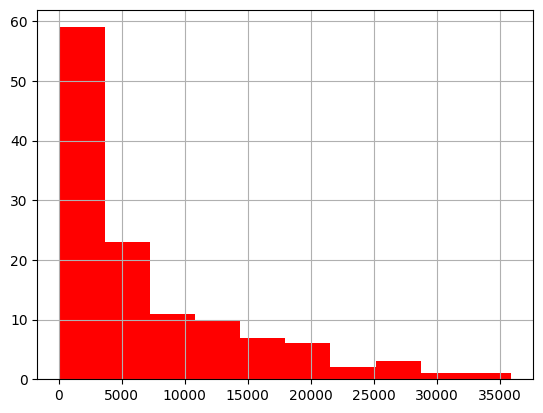

In [ ]:
gse111631_betas_dropped.isna().sum().hist(color='red')

In [ ]:
missing_10 = pd.read_csv('/content/data/Shareddrives/Deep_Learning_G&R/gse111631_10.csv').rename(columns={'Unnamed: 0':'id'}).set_index('id')
print(missing_10.shape)
missing_10.head()

(123, 100)


,cg17357548,cg24592462,cg07068870,cg07576175,cg04384867,cg06293982,cg07452706,cg09622586,cg19249622,cg26688435,...,cg01021551,cg13299707,cg23355015,cg26557696,cg00942293,cg23842941,cg17573068,cg11070059,cg27352639,cg01744133
id,,,,,,,,,,,,,,,,,,,,,
201172560029_R04C01,0.945,0.014,0.066,0.022,NaN,0.940,0.300,NaN,0.972,0.964,...,0.016,0.858,0.976,0.896,0.870,NaN,0.015,0.159,0.045,0.048
201172560029_R05C01,0.949,0.013,0.048,0.026,0.957,0.930,0.352,0.957,0.973,0.960,...,0.015,0.776,0.973,0.922,0.898,0.736,0.017,0.158,0.063,0.055
201172560029_R06C01,0.932,0.013,0.051,0.020,0.964,0.936,0.315,0.964,0.970,0.963,...,NaN,0.795,0.977,0.930,0.891,0.741,0.016,0.181,0.065,0.043
201172560029_R07C01,0.951,0.011,NaN,0.029,0.967,NaN,0.242,0.957,0.953,0.966,...,0.016,NaN,0.972,0.927,NaN,0.755,0.018,0.159,0.066,0.055
201172560029_R08C01,0.932,0.011,0.062,0.025,0.970,0.939,0.335,0.955,0.969,0.942,...,0.019,0.866,0.979,0.855,0.884,0.788,0.016,0.237,0.043,0.048


<Axes: title={'center': 'Missing Probe Value Spread'}, xlabel='Sample Probe Values Missing per Probe', ylabel='# probes'>

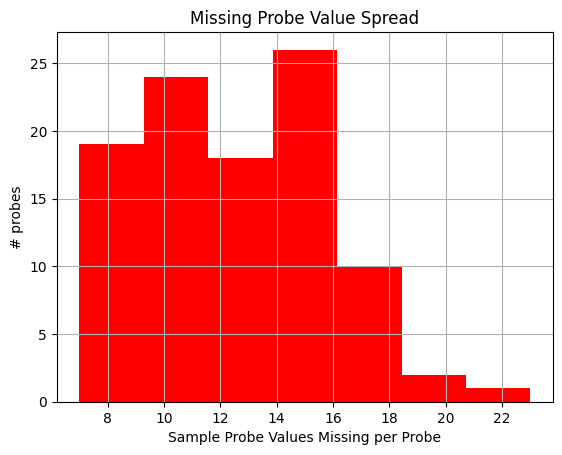

In [ ]:
plt.title('Missing Probe Value Spread')
plt.xlabel('Sample Probe Values Missing per Probe')
plt.ylabel('# probes')
missing_10.isna().sum().hist(bins=7,color='red')

<Axes: title={'center': 'gse111631 10% Missing Variance'}, xlabel='Variance', ylabel='# probes'>

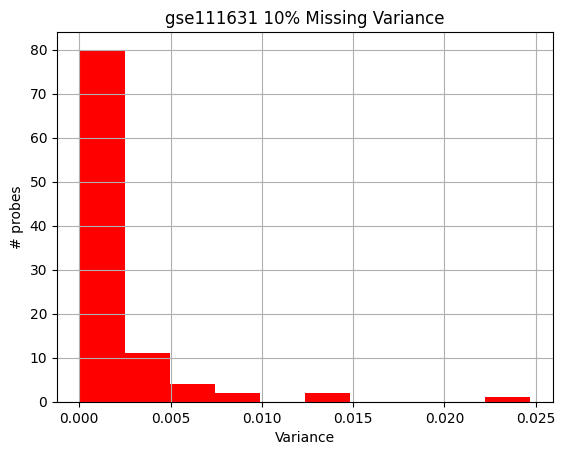

In [ ]:
plt.title('gse111631 10% Missing Variance')
plt.ylabel('# probes')
plt.xlabel('Variance')
missing_10.var().hist(color='red')

Text(0.5, 1.0, 'beta-value Heatmap')

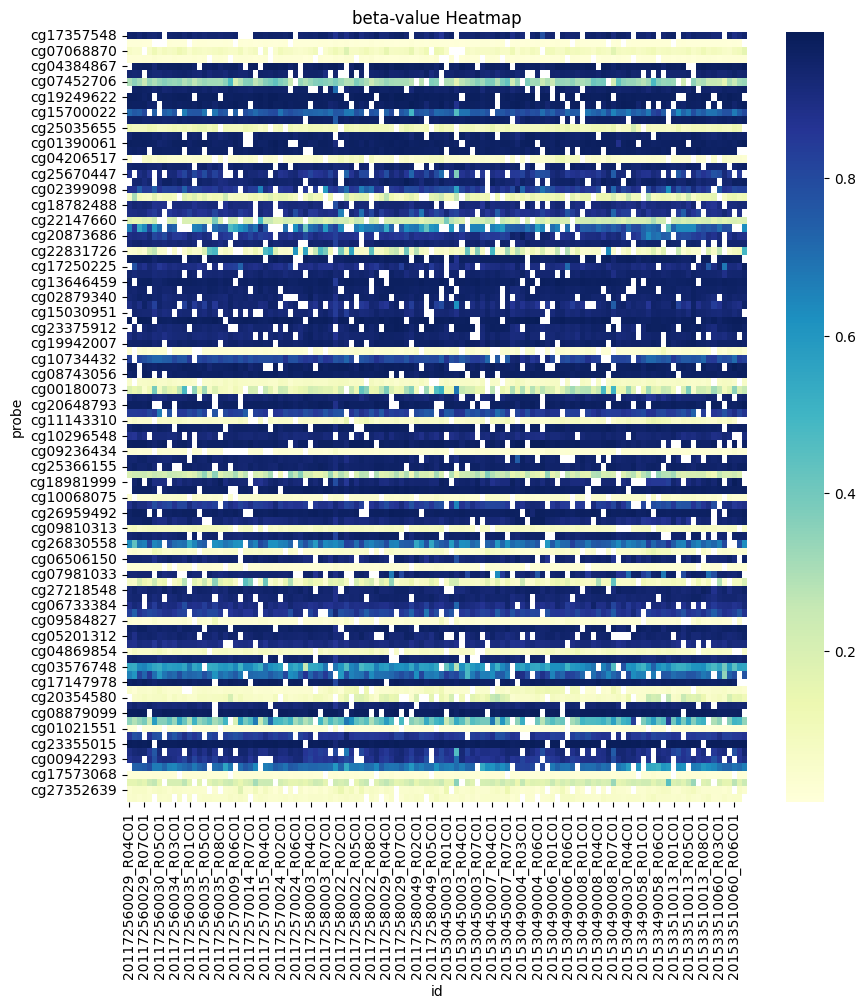

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(missing_10.T, cmap='YlGnBu')
plt.ylabel('probe')
plt.title('beta-value Heatmap')


In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
# from missingpy import MissForest
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
# a dictionary to put all of the accuracies
accuracies = {}

In [ ]:
# loading data with 10% missing
gse111631_10 = pd.read_csv('/content/data/Shareddrives/Deep_Learning_G&R/gse111631_10.csv').rename(columns={'Unnamed: 0':'Sample'}).set_index('Sample')
print(gse111631_10.isna().sum().sum()/(gse111631_10.shape[0]*gse111631_10.shape[1])*100, '% missing values')
print(gse111631_10.shape)
gse111631_10.head()

10.252032520325203 % missing values
(123, 100)


,cg17357548,cg24592462,cg07068870,cg07576175,cg04384867,cg06293982,cg07452706,cg09622586,cg19249622,cg26688435,...,cg01021551,cg13299707,cg23355015,cg26557696,cg00942293,cg23842941,cg17573068,cg11070059,cg27352639,cg01744133
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R04C01,0.945,0.014,0.066,0.022,NaN,0.940,0.300,NaN,0.972,0.964,...,0.016,0.858,0.976,0.896,0.870,NaN,0.015,0.159,0.045,0.048
201172560029_R05C01,0.949,0.013,0.048,0.026,0.957,0.930,0.352,0.957,0.973,0.960,...,0.015,0.776,0.973,0.922,0.898,0.736,0.017,0.158,0.063,0.055
201172560029_R06C01,0.932,0.013,0.051,0.020,0.964,0.936,0.315,0.964,0.970,0.963,...,NaN,0.795,0.977,0.930,0.891,0.741,0.016,0.181,0.065,0.043
201172560029_R07C01,0.951,0.011,NaN,0.029,0.967,NaN,0.242,0.957,0.953,0.966,...,0.016,NaN,0.972,0.927,NaN,0.755,0.018,0.159,0.066,0.055
201172560029_R08C01,0.932,0.011,0.062,0.025,0.970,0.939,0.335,0.955,0.969,0.942,...,0.019,0.866,0.979,0.855,0.884,0.788,0.016,0.237,0.043,0.048


In [ ]:
# loading original
original_gse111631 = pd.read_csv('/content/data/Shareddrives/Deep_Learning_G&R/gse111631_original.csv').rename(columns={'Unnamed: 0':'Sample'}).set_index('Sample')
print(original_gse111631.shape)
original_gse111631.head()

(123, 100)


,cg17357548,cg24592462,cg07068870,cg07576175,cg04384867,cg06293982,cg07452706,cg09622586,cg19249622,cg26688435,...,cg01021551,cg13299707,cg23355015,cg26557696,cg00942293,cg23842941,cg17573068,cg11070059,cg27352639,cg01744133
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R04C01,0.945,0.014,0.066,0.022,0.973,0.940,0.300,0.929,0.972,0.964,...,0.016,0.858,0.976,0.896,0.870,0.751,0.015,0.159,0.045,0.048
201172560029_R05C01,0.949,0.013,0.048,0.026,0.957,0.930,0.352,0.957,0.973,0.960,...,0.015,0.776,0.973,0.922,0.898,0.736,0.017,0.158,0.063,0.055
201172560029_R06C01,0.932,0.013,0.051,0.020,0.964,0.936,0.315,0.964,0.970,0.963,...,0.015,0.795,0.977,0.930,0.891,0.741,0.016,0.181,0.065,0.043
201172560029_R07C01,0.951,0.011,0.068,0.029,0.967,0.922,0.242,0.957,0.953,0.966,...,0.016,0.836,0.972,0.927,0.880,0.755,0.018,0.159,0.066,0.055
201172560029_R08C01,0.932,0.011,0.062,0.025,0.970,0.939,0.335,0.955,0.969,0.942,...,0.019,0.866,0.979,0.855,0.884,0.788,0.016,0.237,0.043,0.048


In [ ]:
def get_accuracies(imputed, missing=gse111631_10, original=original_gse111631):
    # sum of squared errors, mean of average absolute errors, root mean squared error
    ret = {}
    ret['sse'] = ((imputed.mask(~missing.isna()) - original.mask(~missing.isna()))**2).sum().sum()
    ret['mae'] = (imputed.mask(~missing.isna()) - original.mask(~missing.isna())).abs().sum().mean()
    ret['rmse'] = (((imputed.mask(~missing.isna()) - original.mask(~missing.isna()))**2).sum().mean())**(1/2)
    return ret

## kNN imputation

In [ ]:
def knns(original: pd.DataFrame, missing: pd.DataFrame, n_neighbors: list=[1,2,3,4,5]):
    accuracies = {}
    for k in n_neighbors:
        print(f'starting {k} neighbor')
        imputer = KNNImputer(n_neighbors=k)
        imputed = pd.DataFrame(imputer.fit_transform(missing), columns=original.columns, index=original.index)

        accuracies[k] = get_accuracies(imputed)
    return accuracies

In [ ]:
knn_accs = knns(original_gse111631, gse111631_10, n_neighbors=[1,2,3,4,5,6,7,8,9,10])
knn_accs

starting 1 neighbor
starting 2 neighbor
starting 3 neighbor
starting 4 neighbor
starting 5 neighbor
starting 6 neighbor
starting 7 neighbor
starting 8 neighbor
starting 9 neighbor
starting 10 neighbor


{1: {'sse': 2.745881, 'mae': 0.2997099999999999, 'rmse': 0.16570700045562348},
 2: {'sse': 2.5138179999999997,
  'mae': 0.26869999999999994,
  'rmse': 0.15855024440220833},
 3: {'sse': 2.3294463333333337,
  'mae': 0.25916333333333336,
  'rmse': 0.15262523819255233},
 4: {'sse': 2.1643499999999998,
  'mae': 0.25758499999999995,
  'rmse': 0.14711730013835897},
 5: {'sse': 2.041209839999999,
  'mae': 0.2548839999999999,
  'rmse': 0.1428709151647038},
 6: {'sse': 1.995810638888889,
  'mae': 0.25384499999999993,
  'rmse': 0.14127316230936748},
 7: {'sse': 1.9651260408163262,
  'mae': 0.2518428571428571,
  'rmse': 0.14018295334370462},
 8: {'sse': 1.9550393593749997,
  'mae': 0.2516412499999999,
  'rmse': 0.13982272202238805},
 9: {'sse': 1.9326522716049386,
  'mae': 0.2512555555555555,
  'rmse': 0.1390198644656561},
 10: {'sse': 1.8976321800000002,
  'mae': 0.25015999999999994,
  'rmse': 0.13775457088605084}}

## MICE Imputer

In [ ]:
!pip install fancyimpute


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=a131957f6fa1c05d4a2dea96cb37223d509d18c6e2a4a9265d153672d58fa705
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11335 sha256=79af980cb40fa0bfd9696380611cfb9e7dafb550c9777ca6b73838dca9697b3c
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import IterativeImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming original and missing are pandas DataFrames
def mice_imputation(original, missing):
    mice_imputer = IterativeImputer()
    completed = mice_imputer.fit_transform(missing)

    completed_df = pd.DataFrame(completed, columns=original.columns)

    # Calculate metrics
    sse = np.sum((original - completed_df)**2)
    mae = mean_absolute_error(original, completed_df)
    rmse = np.sqrt(mean_squared_error(original, completed_df))

    return completed_df, {'sse': sse, 'mae': mae, 'rmse': rmse}


In [ ]:
mice_df,mice_accs = mice_imputation(original_gse111631, gse111631_10)
mice_accs

{'sse': cg17357548    0.0
 cg24592462    0.0
 cg07068870    0.0
 cg07576175    0.0
 cg04384867    0.0
              ... 
 cg23842941    0.0
 cg17573068    0.0
 cg11070059    0.0
 cg27352639    0.0
 cg01744133    0.0
 Length: 100, dtype: float64,
 'mae': 0.0018040823900517893,
 'rmse': 0.011351522686146814}

## Mean Imputation

In [ ]:
mean_imputed = gse111631_10.replace(to_replace=np.nan, value=gse111631_10.mean())
print(mean_imputed.shape)
mean_imputed.head()

(123, 100)


,cg17357548,cg24592462,cg07068870,cg07576175,cg04384867,cg06293982,cg07452706,cg09622586,cg19249622,cg26688435,...,cg01021551,cg13299707,cg23355015,cg26557696,cg00942293,cg23842941,cg17573068,cg11070059,cg27352639,cg01744133
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R04C01,0.945,0.014,0.066000,0.022,0.967055,0.94000,0.300,0.947455,0.972,0.964,...,0.016000,0.858000,0.976,0.896,0.870000,0.685294,0.015,0.159,0.045,0.048
201172560029_R05C01,0.949,0.013,0.048000,0.026,0.957000,0.93000,0.352,0.957000,0.973,0.960,...,0.015000,0.776000,0.973,0.922,0.898000,0.736000,0.017,0.158,0.063,0.055
201172560029_R06C01,0.932,0.013,0.051000,0.020,0.964000,0.93600,0.315,0.964000,0.970,0.963,...,0.020089,0.795000,0.977,0.930,0.891000,0.741000,0.016,0.181,0.065,0.043
201172560029_R07C01,0.951,0.011,0.084956,0.029,0.967000,0.93961,0.242,0.957000,0.953,0.966,...,0.016000,0.844318,0.972,0.927,0.870391,0.755000,0.018,0.159,0.066,0.055
201172560029_R08C01,0.932,0.011,0.062000,0.025,0.970000,0.93900,0.335,0.955000,0.969,0.942,...,0.019000,0.866000,0.979,0.855,0.884000,0.788000,0.016,0.237,0.043,0.048


In [ ]:
mean_accuracies = get_accuracies(mean_imputed, gse111631_10, original_gse111631)
mean_accuracies

{'sse': 2.118268486141152,
 'mae': 0.2739851182306732,
 'rmse': 0.145542725209512}

In [ ]:
accuracies['mean_imputation'] = mean_accuracies

## Median Imputation

In [ ]:
median_imputed = gse111631_10.replace(to_replace=np.nan, value=gse111631_10.median())
print(median_imputed.shape)
median_imputed.head()

(123, 100)


,cg17357548,cg24592462,cg07068870,cg07576175,cg04384867,cg06293982,cg07452706,cg09622586,cg19249622,cg26688435,...,cg01021551,cg13299707,cg23355015,cg26557696,cg00942293,cg23842941,cg17573068,cg11070059,cg27352639,cg01744133
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R04C01,0.945,0.014,0.066,0.022,0.970,0.940,0.300,0.9515,0.972,0.964,...,0.016,0.8580,0.976,0.896,0.870,0.690,0.015,0.159,0.045,0.048
201172560029_R05C01,0.949,0.013,0.048,0.026,0.957,0.930,0.352,0.9570,0.973,0.960,...,0.015,0.7760,0.973,0.922,0.898,0.736,0.017,0.158,0.063,0.055
201172560029_R06C01,0.932,0.013,0.051,0.020,0.964,0.936,0.315,0.9640,0.970,0.963,...,0.020,0.7950,0.977,0.930,0.891,0.741,0.016,0.181,0.065,0.043
201172560029_R07C01,0.951,0.011,0.080,0.029,0.967,0.940,0.242,0.9570,0.953,0.966,...,0.016,0.8475,0.972,0.927,0.876,0.755,0.018,0.159,0.066,0.055
201172560029_R08C01,0.932,0.011,0.062,0.025,0.970,0.939,0.335,0.9550,0.969,0.942,...,0.019,0.8660,0.979,0.855,0.884,0.788,0.016,0.237,0.043,0.048


In [ ]:
median_accuracies = get_accuracies(median_imputed)
median_accuracies

{'sse': 2.2471615, 'mae': 0.26358, 'rmse': 0.14990535347345002}

In [ ]:
accuracies['median_imputation'] = median_accuracies

## Mode Imputation

In [ ]:
mode_imputed = gse111631_10.replace(to_replace=np.nan, value=gse111631_10.mode().mean())
print(mode_imputed.shape)
mode_imputed.head()

(123, 100)


,cg17357548,cg24592462,cg07068870,cg07576175,cg04384867,cg06293982,cg07452706,cg09622586,cg19249622,cg26688435,...,cg01021551,cg13299707,cg23355015,cg26557696,cg00942293,cg23842941,cg17573068,cg11070059,cg27352639,cg01744133
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R04C01,0.945,0.014,0.066,0.022,0.971,0.940,0.300,0.952,0.972,0.964,...,0.016,0.858,0.976,0.896,0.8700,0.702,0.015,0.159,0.045,0.048
201172560029_R05C01,0.949,0.013,0.048,0.026,0.957,0.930,0.352,0.957,0.973,0.960,...,0.015,0.776,0.973,0.922,0.8980,0.736,0.017,0.158,0.063,0.055
201172560029_R06C01,0.932,0.013,0.051,0.020,0.964,0.936,0.315,0.964,0.970,0.963,...,0.020,0.795,0.977,0.930,0.8910,0.741,0.016,0.181,0.065,0.043
201172560029_R07C01,0.951,0.011,0.078,0.029,0.967,0.940,0.242,0.957,0.953,0.966,...,0.016,0.840,0.972,0.927,0.8925,0.755,0.018,0.159,0.066,0.055
201172560029_R08C01,0.932,0.011,0.062,0.025,0.970,0.939,0.335,0.955,0.969,0.942,...,0.019,0.866,0.979,0.855,0.8840,0.788,0.016,0.237,0.043,0.048


In [ ]:
mode_accuracies = get_accuracies(mode_imputed)
mode_accuracies

{'sse': 2.4374425488715272,
 'mae': 0.27633945833333323,
 'rmse': 0.15612311004049104}

In [ ]:
accuracies['mode_imputation'] = mode_accuracies

## missForest

In [ ]:
# !pip install MissForest
# import missingpy
# from missingpy import MissForest


# clf = MissForest(max_iter=1000, random_state=100)
# clf.fit(np.array(gse111631_10))
# missForest_imputed = clf.transform(gse111631_10)
# missForest_imputed = pd.DataFrame(missForest_imputed, columns=gse111631_10.columns, index=gse111631_10.index)
# print(missForest_imputed.shape)
# missForest_imputed.head()

# !pip install MissForestExtra
from MissForestExtra import MissForestExtra
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

mfe = MissForestExtra()
rfc = RandomForestClassifier()
rfr = RandomForestRegressor()
mfe_imputed = mfe.impute(gse111631_10, rfc, rfr)
mfe_imputed.head

In [ ]:
miss_forest_accuracies = get_accuracies(mfe_imputed)
miss_forest_accuracies

{'sse': 0.0, 'mae': 0.0, 'rmse': 0.0}

In [ ]:
accuracies['miss_forest'] = miss_forest_accuracies

## Iterative Imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
clf = IterativeImputer(imputation_order='random', min_value=0, max_value=1, verbose=True)
clf.fit(np.array(gse111631_10))
iterative_imputed = clf.transform(gse111631_10)
iterative_imputed = pd.DataFrame(iterative_imputed, columns=gse111631_10.columns, index=gse111631_10.index)
print(iterative_imputed.shape)
iterative_imputed.head()

[IterativeImputer] Completing matrix with shape (123, 100)
[IterativeImputer] Change: 0.5571725337146145, scaled tolerance: 0.0009860000000000001 
[IterativeImputer] Change: 0.0735474993246777, scaled tolerance: 0.0009860000000000001 
[IterativeImputer] Change: 0.022017950566904643, scaled tolerance: 0.0009860000000000001 
[IterativeImputer] Change: 0.00683051973194386, scaled tolerance: 0.0009860000000000001 
[IterativeImputer] Change: 0.0019214985180968092, scaled tolerance: 0.0009860000000000001 
[IterativeImputer] Change: 0.0005436154773842822, scaled tolerance: 0.0009860000000000001 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (123, 100)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IterativeImputer was fitted without feature names
  warnings.warn(


(123, 100)


,cg17357548,cg24592462,cg07068870,cg07576175,cg04384867,cg06293982,cg07452706,cg09622586,cg19249622,cg26688435,...,cg01021551,cg13299707,cg23355015,cg26557696,cg00942293,cg23842941,cg17573068,cg11070059,cg27352639,cg01744133
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R04C01,0.945,0.014,0.066000,0.022,0.965577,0.94000,0.300,0.942454,0.972,0.964,...,0.016000,0.858000,0.976,0.896,0.870000,0.71473,0.015,0.159,0.045,0.048
201172560029_R05C01,0.949,0.013,0.048000,0.026,0.957000,0.93000,0.352,0.957000,0.973,0.960,...,0.015000,0.776000,0.973,0.922,0.898000,0.73600,0.017,0.158,0.063,0.055
201172560029_R06C01,0.932,0.013,0.051000,0.020,0.964000,0.93600,0.315,0.964000,0.970,0.963,...,0.017362,0.795000,0.977,0.930,0.891000,0.74100,0.016,0.181,0.065,0.043
201172560029_R07C01,0.951,0.011,0.062796,0.029,0.967000,0.93395,0.242,0.957000,0.953,0.966,...,0.016000,0.820815,0.972,0.927,0.895475,0.75500,0.018,0.159,0.066,0.055
201172560029_R08C01,0.932,0.011,0.062000,0.025,0.970000,0.93900,0.335,0.955000,0.969,0.942,...,0.019000,0.866000,0.979,0.855,0.884000,0.78800,0.016,0.237,0.043,0.048


In [ ]:
iterative_accuracies = get_accuracies(iterative_imputed)
iterative_accuracies

{'sse': 1.5849368797674057,
 'mae': 0.22190303135031494,
 'rmse': 0.12589427627050429}

In [ ]:
accuracies['iterative'] = iterative_accuracies

## Autoencoder Tensorflow

Adapted from this tutorial: https://curiousily.com/posts/data-imputation-using-autoencoders/

In [ ]:

import pandas as pd
import numpy as np
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.losses import MeanSquaredError
from keras.models import Sequential
from keras.layers.core import Dropout, Dense
from keras.regularizers import l1_l2
from collections import defaultdict


In [ ]:
def make_reconstruction_loss(n_features):
    def reconstruction_loss(input_and_mask, y_pred):

        X_values = input_and_mask[:, :n_features]
        missing_mask = input_and_mask[:, n_features:]
        observed_mask = 1 - missing_mask
        X_values_observed = X_values * observed_mask
        pred_observed = y_pred * observed_mask
        mse = MeanSquaredError()
        return mse(y_true=X_values_observed, y_pred=pred_observed)
    return reconstruction_loss


In [ ]:
def masked_mae(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(np.abs(masked_diff))

In [ ]:
class Autoencoder:
    def __init__(self, data,
                 recurrent_weight=0.5,
                 optimizer="adam",
                 dropout_probability=0.5,
                 hidden_activation="relu",
                 output_activation="sigmoid",
                 init="glorot_normal",
                 l1_penalty=0,
                 l2_penalty=0):
        self.data = data.copy()
        self.recurrent_weight = recurrent_weight
        self.optimizer = optimizer
        self.dropout_probability = dropout_probability
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.init = init
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    def _get_hidden_layer_sizes(self):
        n_dims = self.data.shape[1]
        return [
            min(2000, 8 * n_dims),
            min(500, 2 * n_dims),
            int(np.ceil(0.5 * n_dims)),
        ]
    def _create_model(self):
        hidden_layer_sizes = self._get_hidden_layer_sizes()
        first_layer_size = hidden_layer_sizes[0]
        n_dims = self.data.shape[1]
        model = Sequential()
        model.add(Dense(
            first_layer_size,
            input_dim= 2 * n_dims,
            activation=self.hidden_activation,
            activity_regularizer=l1_l2(self.l1_penalty, self.l2_penalty)))
        model.add(Dropout(self.dropout_probability))
        for layer_size in hidden_layer_sizes[1:]:
            model.add(Dense(
                layer_size,
                activation=self.hidden_activation,
                activity_regularizer=l1_l2(self.l1_penalty, self.l2_penalty)))
            model.add(Dropout(self.dropout_probability))
        model.add(Dense(
            n_dims,
            activation=self.output_activation,
            activity_regularizer=l1_l2(self.l1_penalty, self.l2_penalty)))
        loss_function = make_reconstruction_loss(n_dims)
        model.compile(optimizer=self.optimizer, loss=loss_function)
        return model
    def fill(self, missing_mask):
        self.data[missing_mask] = -1
    def _create_missing_mask(self):
        if self.data.dtype != "f" and self.data.dtype != "d":
            self.data = self.data.astype(float)
        return np.isnan(self.data)
    def _train_epoch(self, model, missing_mask, batch_size):
        input_with_mask = np.hstack([self.data, missing_mask])
        n_samples = len(input_with_mask)
        n_batches = int(np.ceil(n_samples / batch_size))
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_shuffled = input_with_mask[indices]
        for batch_idx in range(n_batches):
            batch_start = batch_idx * batch_size
            batch_end = (batch_idx + 1) * batch_size
            batch_data = X_shuffled[batch_start:batch_end, :]
            model.train_on_batch(batch_data, batch_data)
        return model.predict(input_with_mask)
    def train(self, batch_size=256, train_epochs=100):
        missing_mask = self._create_missing_mask()
        self.fill(missing_mask)
        self.model = self._create_model()
        observed_mask = ~missing_mask
        ret_acc = {}
        for epoch in range(train_epochs):
            X_pred = self._train_epoch(self.model, missing_mask, batch_size)
            observed_mae = masked_mae(X_true=self.data,
                                    X_pred=X_pred,
                                    mask=observed_mask)
            if epoch % 50 == 0:
                acc = get_accuracies(pd.DataFrame(X_pred, columns=gse111631_10.columns, index=gse111631_10.index))
                ret_acc[epoch] = {'observed':observed_mae, 'test_sse':acc['sse'], 'test_mae':acc['mae'], 'test_rmse':acc['rmse']}
                print("observed mae:", observed_mae, 'test_sse:', acc['sse'], 'epoch:', epoch)
            old_weight = (1.0 - self.recurrent_weight)
            self.data[missing_mask] *= old_weight
            pred_missing = X_pred[missing_mask]
            self.data[missing_mask] += self.recurrent_weight * pred_missing
        return self.data.copy(), ret_acc


In [ ]:
autoencoder_epochs = 200
imputer = Autoencoder(gse111631_10.values)
complete_encoded, _ = imputer.train(train_epochs=autoencoder_epochs, batch_size=256)
complete_encoded

4/4 [==============================] - 0s 8ms/step
observed mae: 0.3992128904775299 test_sse: 215.18221122554758 epoch: 0
4/4 [==============================] - 0s 7ms/step
observed mae: 0.05778648226040008 test_sse: 8.446958698861772 epoch: 50
4/4 [==============================] - 0s 6ms/step
observed mae: 0.04577146872984241 test_sse: 5.387654223140205 epoch: 100
4/4 [==============================] - 0s 6ms/step
observed mae: 0.03099202260691566 test_sse: 2.973491999238879 epoch: 150
4/4 [==============================] - 0s 6ms/step


array([[0.945     , 0.014     , 0.066     , ..., 0.159     , 0.045     ,
        0.048     ],
       [0.949     , 0.013     , 0.048     , ..., 0.158     , 0.063     ,
        0.055     ],
       [0.932     , 0.013     , 0.051     , ..., 0.181     , 0.065     ,
        0.043     ],
       ...,
       [0.893     , 0.014     , 0.091     , ..., 0.275     , 0.0202957 ,
        0.052     ],
       [0.914     , 0.01      , 0.101     , ..., 0.17      , 0.066     ,
        0.051     ],
       [0.943     , 0.01226682, 0.156     , ..., 0.24      , 0.039     ,
        0.0088737 ]])

In [ ]:
autoencoder_imputed = pd.DataFrame(complete_encoded, columns=gse111631_10.columns, index=gse111631_10.index)
print(autoencoder_imputed.shape)
autoencoder_imputed.head()

(123, 100)


,cg17357548,cg24592462,cg07068870,cg07576175,cg04384867,cg06293982,cg07452706,cg09622586,cg19249622,cg26688435,...,cg01021551,cg13299707,cg23355015,cg26557696,cg00942293,cg23842941,cg17573068,cg11070059,cg27352639,cg01744133
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R04C01,0.945,0.014,0.066000,0.022,0.982026,0.940000,0.300,0.972983,0.972,0.964,...,0.016000,0.858000,0.976,0.896,0.87000,0.73561,0.015,0.159,0.045,0.048
201172560029_R05C01,0.949,0.013,0.048000,0.026,0.957000,0.930000,0.352,0.957000,0.973,0.960,...,0.015000,0.776000,0.973,0.922,0.89800,0.73600,0.017,0.158,0.063,0.055
201172560029_R06C01,0.932,0.013,0.051000,0.020,0.964000,0.936000,0.315,0.964000,0.970,0.963,...,0.014278,0.795000,0.977,0.930,0.89100,0.74100,0.016,0.181,0.065,0.043
201172560029_R07C01,0.951,0.011,0.023102,0.029,0.967000,0.975923,0.242,0.957000,0.953,0.966,...,0.016000,0.921718,0.972,0.927,0.95249,0.75500,0.018,0.159,0.066,0.055
201172560029_R08C01,0.932,0.011,0.062000,0.025,0.970000,0.939000,0.335,0.955000,0.969,0.942,...,0.019000,0.866000,0.979,0.855,0.88400,0.78800,0.016,0.237,0.043,0.048


In [ ]:
autoencoder_accuracies = get_accuracies(autoencoder_imputed)
autoencoder_accuracies

{'sse': 3.8048494460855946,
 'mae': 0.5029204346273535,
 'rmse': 0.1950602329047516}

In [ ]:
accuracies[f'autoencoder_{str(autoencoder_epochs)}_epoch'] = autoencoder_accuracies

## Datawig


In [ ]:
%pip install datawig

In [ ]:
import pandas as pd
import datawig

def datawig_impute(original: pd.DataFrame, missing: pd.DataFrame):
    # Split dataset into train and test
    df_train, df_test = datawig.utils.random_split(original)

    # Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=list(original.columns.values),  # columns containing information about the column we want to impute
        output_column=original.columns.values,  # the column we'd like to impute values for
        output_path='imputer_model'  # stores model data and metrics
    )

    # Fit an imputer model on the train data
    imputer.fit(train_df=df_train, num_epochs=50)

    # Impute missing values and return original dataframe with predictions
    imputed = imputer.predict(df_test)

    return imputed

imputed_datawig = datawig_impute(original_gse111631, gse111631_10)


## Generative Adversarial Imputation Networks (GAIN)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model, Sequential

def get_gain_model(data_dim):
    # generator
    generator = Sequential([
        Dense(64, activation="relu", input_shape=(data_dim*2,)),
        Dense(64, activation="relu"),
        Dense(data_dim, activation="sigmoid")
    ])

    # discriminator
    discriminator = Sequential([
        Dense(64, activation="relu", input_shape=(data_dim*2,)),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")
    ])

    # GAIN model
    generator_input = Input(shape=(data_dim*2,))
    generated_data = generator(generator_input)

    discriminator_input = tf.concat([generator_input, generated_data], axis=1)
    discriminator_output = discriminator(discriminator_input)

    gain = Model(generator_input, discriminator_output)
    gain.compile(optimizer='adam', loss='binary_crossentropy')

    return gain, generator

def train_gain(gain, generator, data, mask, epochs=50, batch_size=256):
    for i in range(epochs):
        indices = np.random.randint(0, data.shape[0], batch_size)
        masked_data = data[indices]
        missing_mask = mask[indices]

        z = np.random.uniform(0, 0.01, (batch_size, data.shape[1]))
        generator_input = np.concatenate([masked_data, missing_mask, z], axis=1)

        # Train discriminator
        generated_data = generator.predict(generator_input)
        true_data = masked_data.copy()
        true_data[missing_mask == 1] = generated_data[missing_mask == 1]
        discriminator_input = np.concatenate([masked_data, generated_data, true_data], axis=0)
        discriminator_labels = np.concatenate([np.zeros((batch_size, 1)), np.ones((batch_size, 1))], axis=0)
        gain.train_on_batch(discriminator_input, discriminator_labels)

        # Train generator
        generator_labels = np.ones((batch_size, 1))
        gain.train_on_batch(generator_input, generator_labels)

    return generator


In [ ]:
def impute_missing_values(generator, data, mask):
    z = np.random.uniform(0, 0.01, (data.shape[0], data.shape[1]))
    generator_input = np.concatenate([data, mask, z], axis=1)
    generated_data = generator.predict(generator_input)

    imputed_data = data.copy()
    imputed_data[mask == 1] = generated_data[mask == 1]
    return imputed_data


In [ ]:
import numpy as np
import pandas as pd

# Assume you have a DataFrame df, and a similar DataFrame mask indicating where data is missing
df = pd.DataFrame(original_gse111631)
mask = pd.DataFrame(gse111631_10)

# Convert the DataFrame to numpy arrays
data = df.to_numpy()
mask = mask.to_numpy()

# Define the dimensions of your data
data_dim = data.shape[1]

# Initialize the GAIN model
gain, generator = get_gain_model(data_dim)

# Train the GAIN model
train_gain(gain, generator, data, mask, epochs=50, batch_size=256)

# Impute missing values
imputed_data = impute_missing_values(generator, data, mask)

# Convert imputed_data back to DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns, index=df.index)


In [ ]:
gain_accuracies = get_accuracies(imputed_df)
gain_accuracies

## Graphs

In [ ]:
pd.DataFrame(ret_acc).T.plot(ylim=(0, 4), color=['red', 'blue', 'green', 'purple'])

In [ ]:
# losses for autoencoder
pd.DataFrame(ret_acc).T.plot(ylim=(0, .7), color=['red', 'blue', 'green', 'purple'])

In [ ]:
accuracies_df = pd.DataFrame(accuracies).T.rename(columns={'sse':'Sum of Squared Errors', 'mae':'Mean Absolute Average Error', 'rmse':'Root Means Squared Error'})
accuracies_df['Sum of Error Metrics'] = accuracies_df.T.sum()
accuracies_df['Mean of Error Metrics'] = accuracies_df.T.mean()
accuracies_df.sort_values(inplace=True, by='Sum of Error Metrics')
accuracies_df = accuracies_df[['Root Means Squared Error', 'Mean Absolute Average Error', 'Mean of Error Metrics', 'Sum of Squared Errors', 'Sum of Error Metrics']]
print(accuracies_df.shape)
accuracies_df

In [ ]:
ax = accuracies_df.boxplot(color='red')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha='left')
plt.title('SSE, MAE, RMSE of Multiple Different Imputation Approaches')

In [ ]:
ax = accuracies_df.plot.bar(width=.9, figsize=(10, 6), y=['Root Means Squared Error', 'Mean Absolute Average Error', 'Sum of Squared Errors'], color=['red', 'blue', 'green'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha='left')
plt.title('Errors for Methylation Beta-Value Imputations')


In [ ]:
ax = accuracies_df.plot.bar(width=.9, figsize=(10, 6), y=['Sum of Error Metrics', 'Mean of Error Metrics'], color=['red', 'purple'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha='left')
plt.title('Errors for Methylation Beta-Value Imputations')


**Deep Clean**

In [ ]:
!pip install deepimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for deepimpute: filename=deepimpute-1.2-py3-none-any.whl size=10175 sha256=edd5e33fa6f10ad97f4fc728751c2b004239642f7202c291345a6d0d306d5d10
  Stored in directory: /root/.cache/pip/wheels/e8/68/d9/6c174ce2d051c972c839a4b2c4991ee830281c381e59178e40
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=838899ef08ebc7d8bf7513679fcf6c210797f4f521b7bb1a9fcf9a9fdaee1e8b
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built deepimpute sklearn
